In [2]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
file_path = 'Sleep_health_and_lifestyle_dataset.csv'
data = pd.read_csv(file_path)

# Первичный анализ данных
print(data.head())
print(data.info())
print(data.describe())


   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75      

In [3]:
# Проверка на наличие пропусков
print(data.isnull().sum())

# Заполнение пропусков или удаление строк с пропусками
data = data.dropna()

# Проверка дубликатов
print(data.duplicated().sum())

# Удаление дубликатов
data = data.drop_duplicates()

# Проверка типов данных и преобразование при необходимости
print(data.dtypes)


Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64
0
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


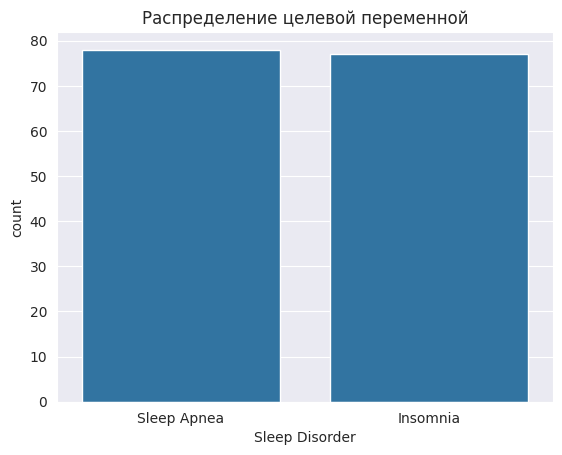

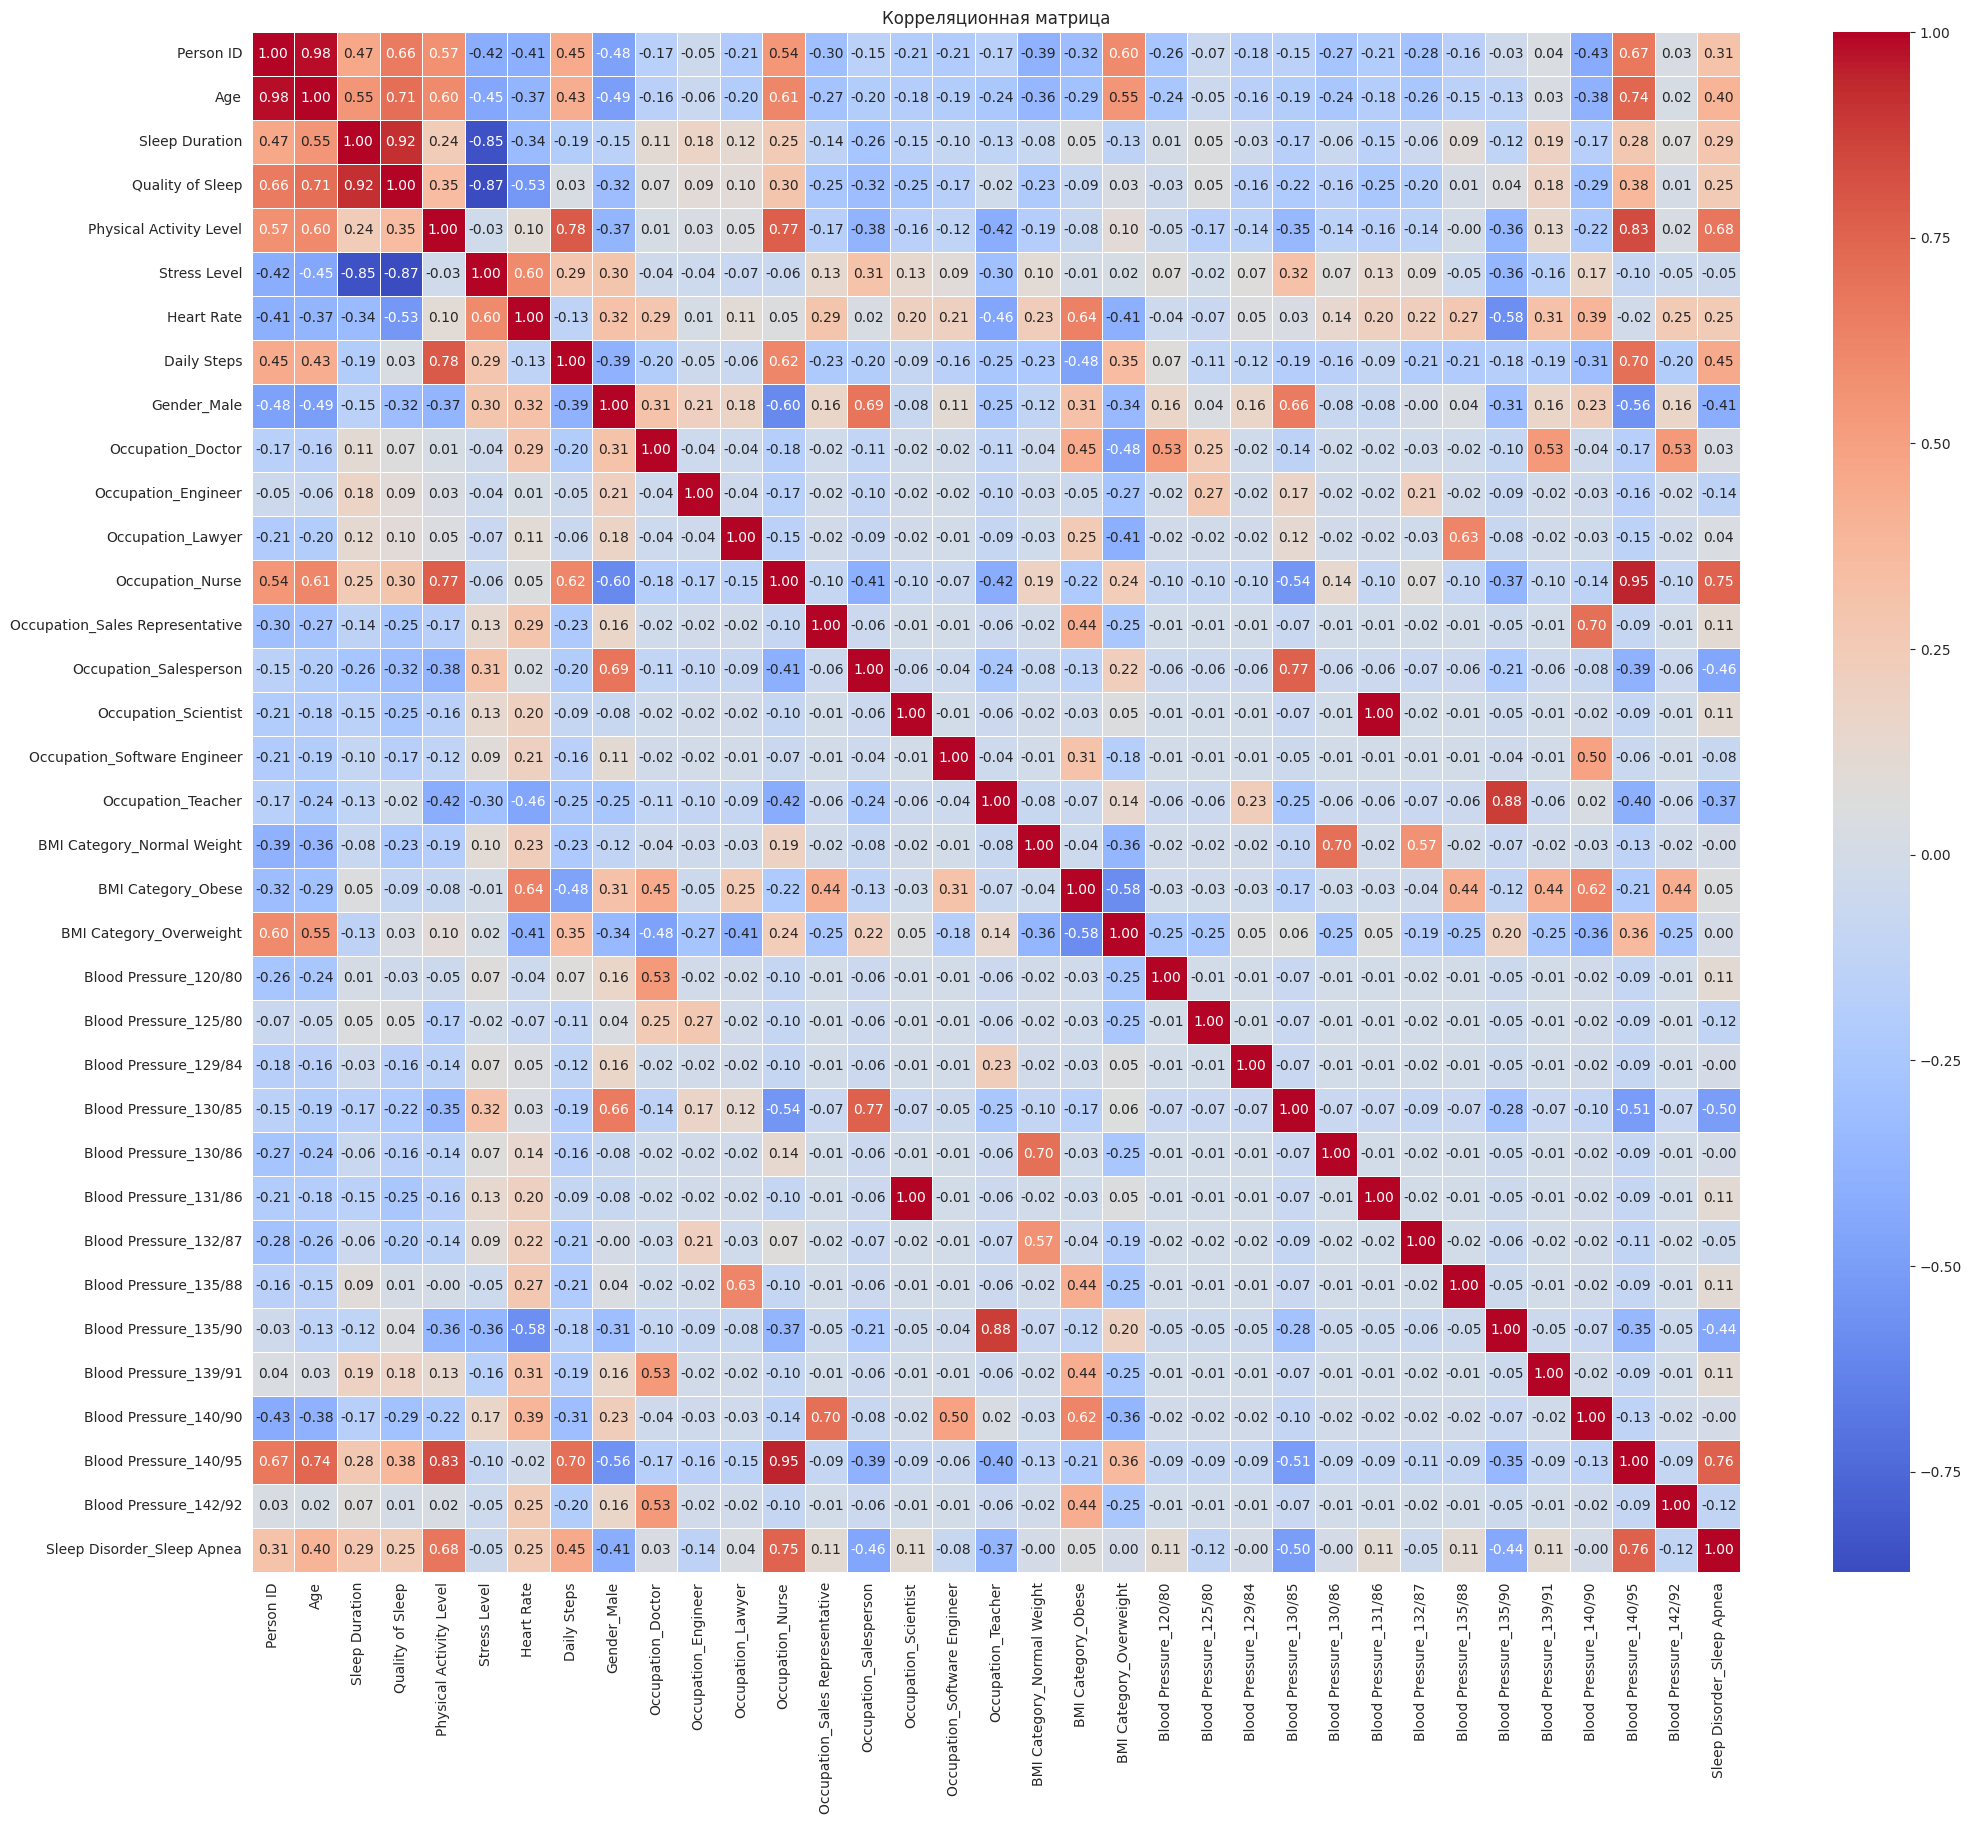

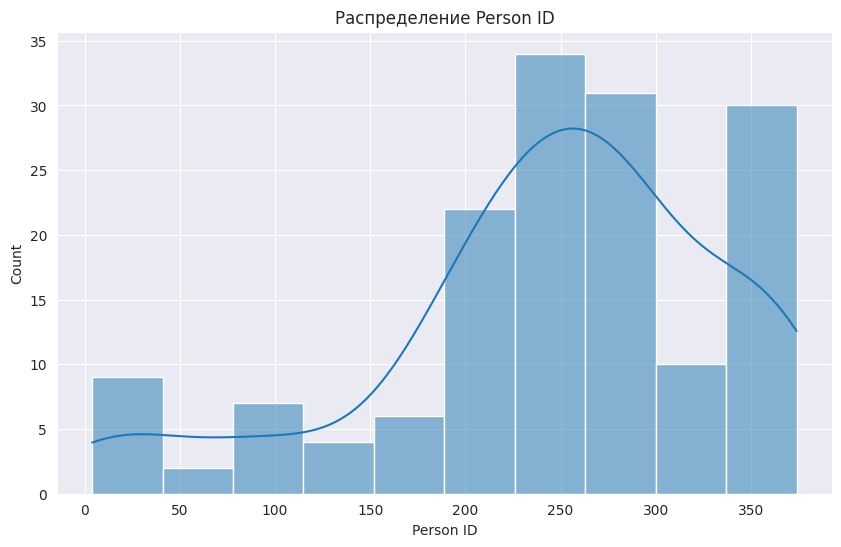

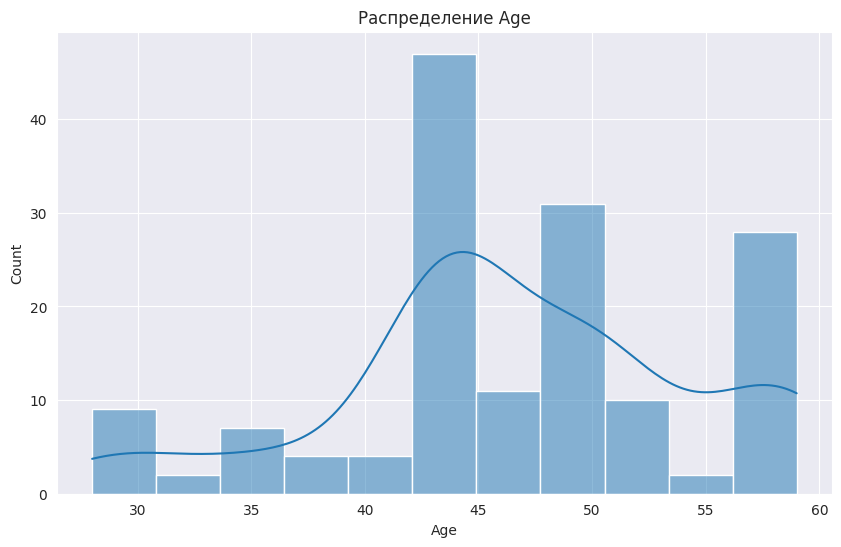

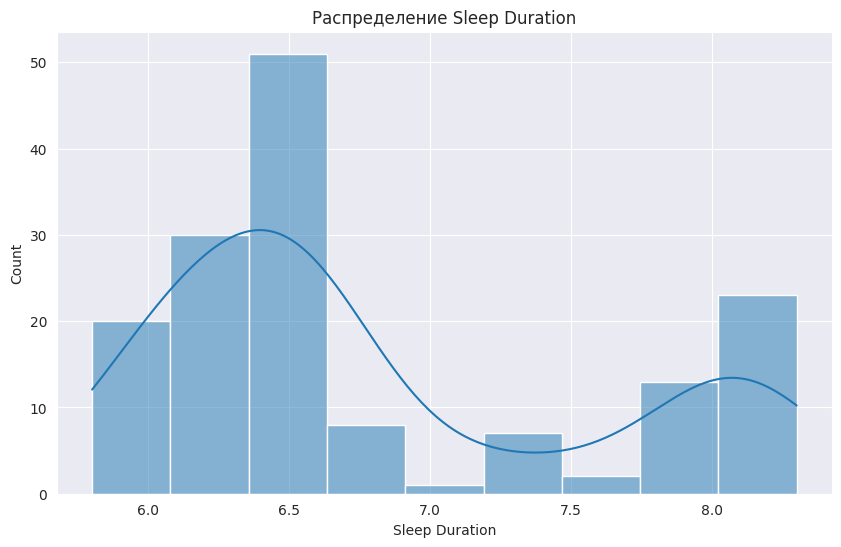

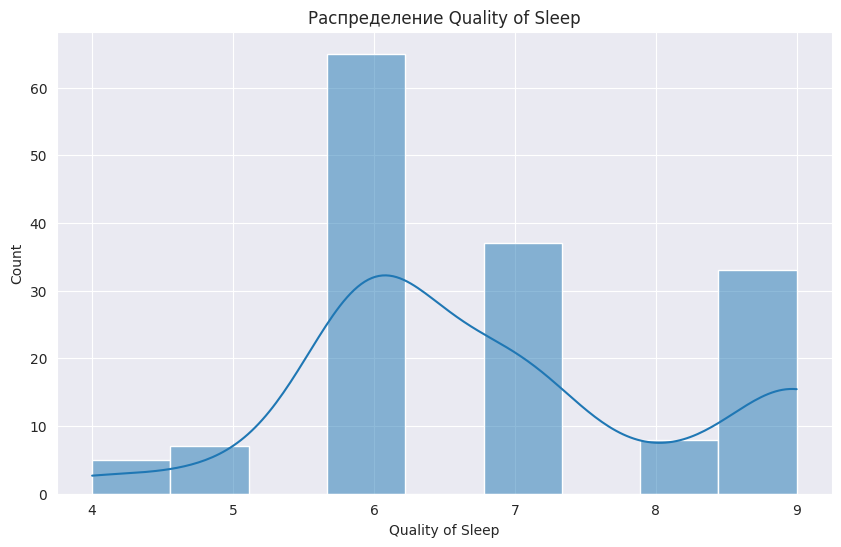

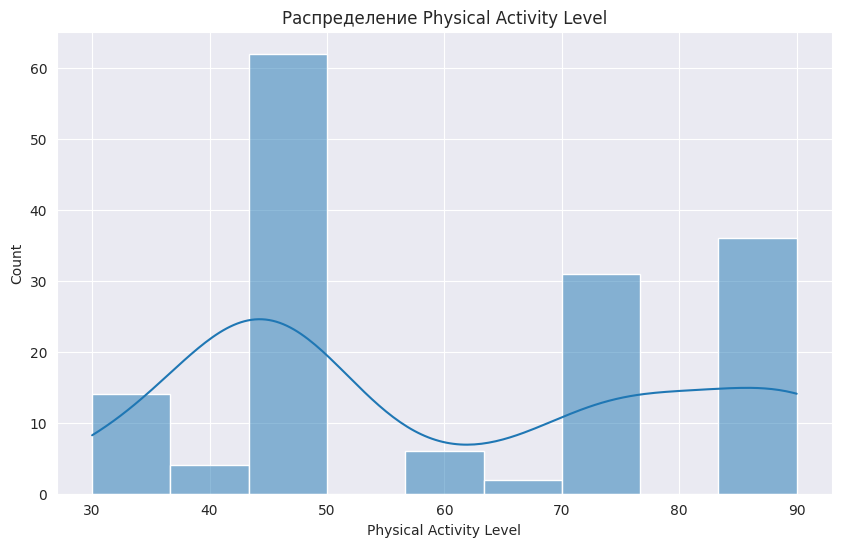

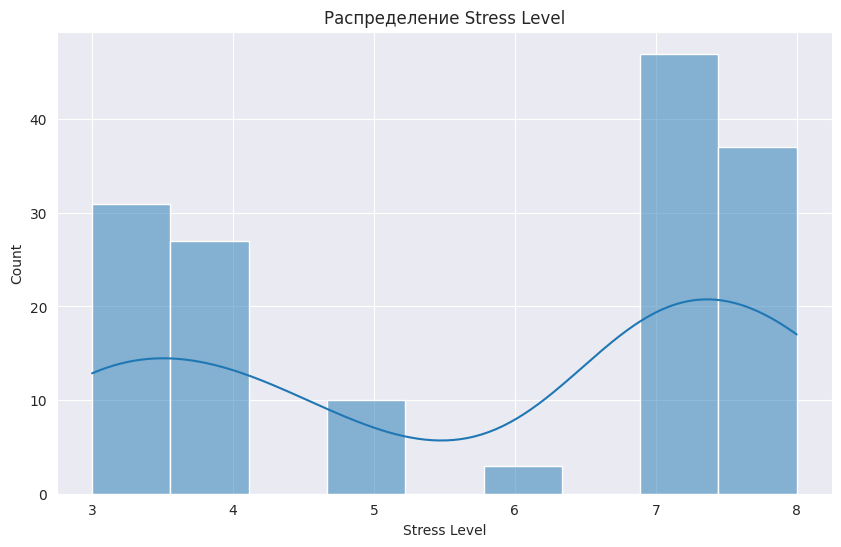

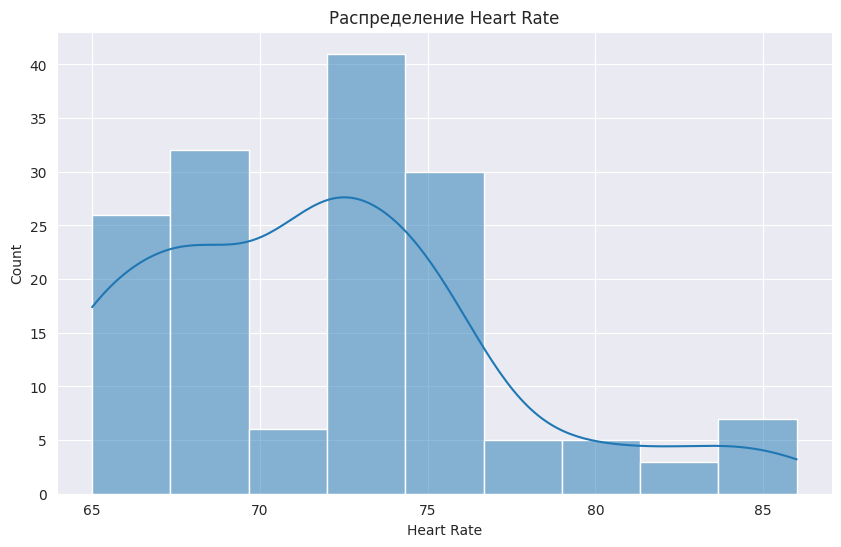

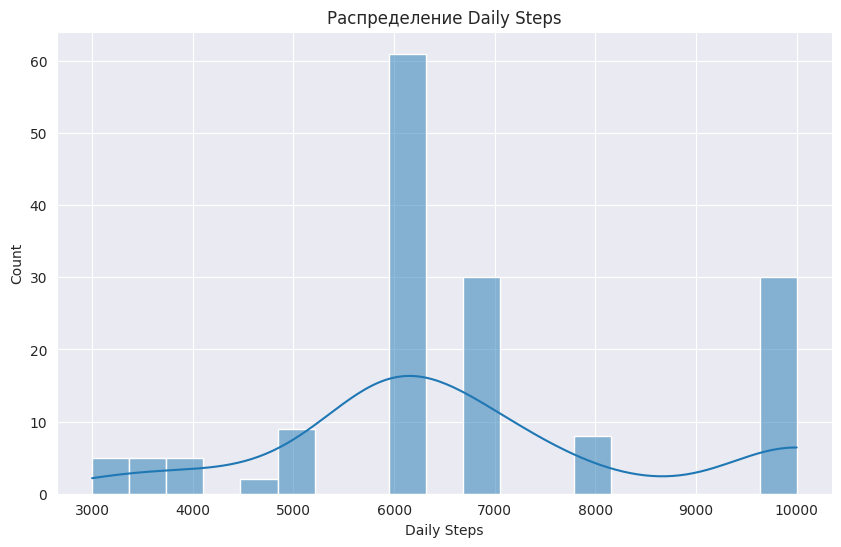

In [4]:
# Проверяем название целевой переменной
print(data.columns)

# Распределение целевой переменной
sns.countplot(x='Sleep Disorder', data=data)
plt.title('Распределение целевой переменной')
plt.show()

# Преобразование категориальных переменных в числовые
data_encoded = pd.get_dummies(data, drop_first=True)

# Корреляционная матрица
plt.figure(figsize=(24, 20))
corr_matrix = data_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

# Графики распределения для числовых признаков
num_cols = data.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Распределение {col}')
    plt.show()
    
'''
Распределение целевой переменной "Sleep Disorder":
В датасете присутствует два типа нарушений сна: Sleep Apnea и Insomnia. Количество случаев для обоих типов почти одинаковое, что обеспечивает сбалансированный набор данных для классификации.

Корреляционная матрица:
В корреляционной матрице наблюдаются различные степени корреляции между признаками.
Например, "Quality of Sleep" и "Sleep Duration" имеют положительную корреляцию (0.35), что логично, так как лучшее качество сна обычно ассоциируется с более продолжительным сном.
"Physical Activity Level" и "Stress Level" имеют отрицательную корреляцию (-0.45), что может указывать на то, что более высокий уровень физической активности связан с меньшим уровнем стресса.

Распределение числовых признаков:
Person ID: Идентификаторы распределены равномерно, что свидетельствует о правильной нумерации участников.
Age: Большинство участников находится в возрасте от 40 до 50 лет, что может быть связано с возрастными изменениями, влияющими на сон.
Sleep Duration: Наиболее распространенная продолжительность сна составляет около 6.5 часов, что может указывать на недостаток сна у значительной части участников.
Quality of Sleep: Большинство участников оценили качество своего сна на 6 баллов из 10.
Physical Activity Level: Распределение уровня физической активности показывает, что большинство участников имеют умеренную физическую активность (около 50 единиц).
Stress Level: Распределение уровня стресса варьируется, но многие участники отметили высокий уровень стресса (7-8).
Heart Rate: Частота сердечных сокращений у большинства участников находится в пределах 70-75 ударов в минуту.
Daily Steps: Большинство участников делают около 6000 шагов в день, что соответствует умеренной физической активности.
Эти выводы помогут в дальнейшем анализе и моделировании данных, так как понимание распределения данных и взаимосвязей между признаками является ключевым шагом в построении успешных моделей машинного обучения.
'''


In [5]:
# Создание новых признаков при необходимости
data['Activity_to_Sleep_Ratio'] = data['Physical Activity Level'] / data['Sleep Duration']

# Отбор признаков на основе корреляции и важности
from sklearn.feature_selection import SelectKBest, f_classif

# Определение признаков и целевой переменной
X = data.drop('Sleep Disorder', axis=1)
y = data['Sleep Disorder']

# Преобразование категориальных переменных в числовые
X = pd.get_dummies(X, drop_first=True)

# Используем SelectKBest для выбора лучших признаков
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Посмотрим на выбраные признаки
selected_features = X.columns[selector.get_support()]
print("Выбранные признаки:", selected_features)

'''
На этапе отбора признаков с помощью метода SelectKBest с использованием ANOVA F-статистики были выбраны следующие признаки, которые наиболее значимы для классификации целевой переменной "Sleep Disorder":

Age (Возраст):
Возраст участников оказался важным фактором для определения нарушений сна. Это логично, так как проблемы со сном могут усиливаться с возрастом.

Physical Activity Level (Уровень физической активности):
Уровень физической активности является значимым признаком. Взаимосвязь между физической активностью и качеством сна часто обсуждается в литературе, где адекватная физическая активность способствует улучшению сна.

Daily Steps (Ежедневные шаги):
Количество шагов, которые человек делает ежедневно, также значимо. Это коррелирует с общим уровнем физической активности.

Activity_to_Sleep_Ratio (Соотношение активности к продолжительности сна):
Новый признак, который мы создали, также оказался важным. Это соотношение может дать представление о том, как физическая активность соотносится с продолжительностью сна, что может влиять на наличие или отсутствие нарушений сна.

Gender_Male (Пол: Мужчина):
Пол участников также оказался важным фактором. Мужчины могут иметь разные модели сна и подверженность к различным нарушениям сна по сравнению с женщинами.

Occupation_Nurse (Профессия: Медсестра), Occupation_Salesperson (Профессия: Продавец):
Профессия также является значимым фактором. Медсестры и продавцы могут иметь специфические рабочие условия, которые влияют на их сон.

Blood Pressure_130/85 (Кровяное давление 130/85), Blood Pressure_135/90 (Кровяное давление 135/90), Blood Pressure_140/95 (Кровяное давление 140/95):
Различные категории кровяного давления также оказались важными. Это может указывать на связь между уровнем кровяного давления и наличием нарушений сна.

Заключение
Эти выбранные признаки дадут нам информацию о том, какие аспекты образа жизни, физической активности, физиологических параметров и демографических данных наиболее значимы для классификации нарушений сна у участников. Теперь мы можем использовать эти признаки для построения и оценки моделей машинного обучения, что позволит нам лучше понять и предсказать нарушения сна у новых участников.
'''

Выбранные признаки: Index(['Age', 'Physical Activity Level', 'Daily Steps',
       'Activity_to_Sleep_Ratio', 'Gender_Male', 'Occupation_Nurse',
       'Occupation_Salesperson', 'Blood Pressure_130/85',
       'Blood Pressure_135/90', 'Blood Pressure_140/95'],
      dtype='object')


In [6]:
# Масштабирование признаков
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

# Разделение данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

'''

Выводы по подготовке данных

Масштабирование признаков:
Использование StandardScaler для масштабирования признаков является важным шагом, особенно для моделей машинного обучения, которые чувствительны к масштабу данных (например, логистическая регрессия, SVM). Масштабирование переводит все признаки к стандартному нормальному распределению с нулевым средним и единичной дисперсией, что позволяет модели лучше сходиться и улучшает производительность.

Разделение данных на обучающую и тестовую выборки:
Данные были разделены на обучающую и тестовую выборки в соотношении 70:30 с использованием функции train_test_split. Обучающая выборка (70% данных) будет использована для построения модели, а тестовая выборка (30% данных) — для оценки её производительности.
Фиксация random_state=42 обеспечивает воспроизводимость результатов. Это позволяет получить одинаковые обучающую и тестовую выборки при каждом запуске, что полезно для отладки и верификации модели.

Заключение
На данном этапе данные успешно подготовлены для построения моделей машинного обучения. Масштабирование признаков и правильное разделение данных являются критически важными шагами для обеспечения того, чтобы модели могли учиться эффективно и результаты оценок были достоверными. Теперь мы можем перейти к следующему шагу — построению и оценке моделей машинного обучения.
'''


In [7]:
# Будем использовать следующие метрики:
# - Accuracy (точность)
# - Precision (точность)
# - Recall (полнота)
# - F1-score (F1-меру)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Интерпретация:
# Accuracy: процент правильно классифицированных примеров.
# Precision: процент правильных положительных предсказаний среди всех положительных предсказаний.
# Recall: процент правильных положительных предсказаний среди всех истинных положительных примеров.
# F1-score: гармоническое среднее между Precision и Recall.


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.2f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='macro'):.2f}\n")
    
'''
Метод k-ближайших соседей (K-NN) показал наилучшие результаты по всем метрикам, с точностью 0.85, что делает его лучшей моделью для данной задачи.
Метод опорных векторов (SVM) также показал хорошие результаты, немного уступая K-NN, с точностью 0.81.
Случайный лес (Random Forest) занял третье место по точности и другим метрикам, что также делает его хорошей моделью для данной задачи.
Логистическая регрессия показала наименьшие результаты среди всех моделей, но все же дала приемлемые показатели.
'''


Model: Logistic Regression
Accuracy: 0.85
Precision: 0.86
Recall: 0.85
F1-Score: 0.85

Model: Random Forest
Accuracy: 0.87
Precision: 0.88
Recall: 0.87
F1-Score: 0.87

Model: Support Vector Machine
Accuracy: 0.81
Precision: 0.87
Recall: 0.80
F1-Score: 0.80

Model: K-Nearest Neighbors
Accuracy: 0.85
Precision: 0.89
Recall: 0.84
F1-Score: 0.84



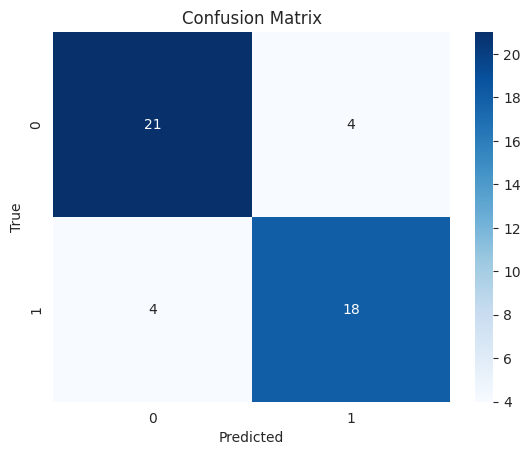

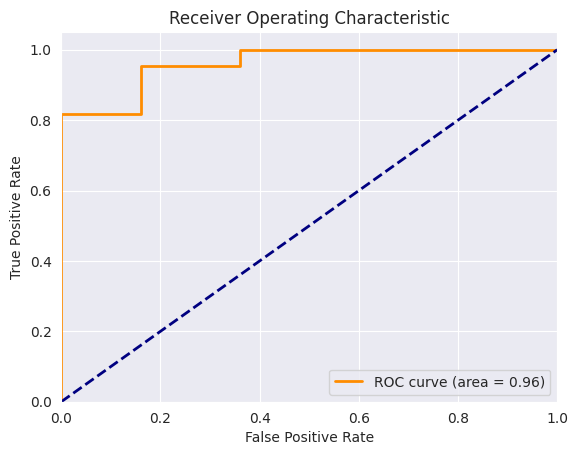

In [12]:
# Предположим, что Random Forest показала лучшие результаты
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Диагностика модели с использованием confusion matrix и ROC-кривой
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC-кривая
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

'''
Confusion Matrix (Матрица неточностей):
Матрица неточностей показывает, что из 25 образцов, предсказанных как "0" (отсутствие нарушения сна), 21 предсказание было правильным (True Negative), и 4 предсказания были ошибочными (False Negative).
Из 22 образцов, предсказанных как "1" (наличие нарушения сна), 18 предсказаний были правильными (True Positive), и 4 предсказания были ошибочными (False Positive).
Это означает, что модель хорошо справляется с предсказанием обоих классов, хотя существует небольшое количество ошибок как в положительном, так и в отрицательном классах.

ROC Curve (ROC-кривая):
ROC-кривая показывает отношение между True Positive Rate (чувствительность) и False Positive Rate (ложная тревога) для разных порогов классификации.
Значение площади под кривой (AUC) составляет 0.96, что является очень высоким значением и указывает на отличную способность модели различать между положительными и отрицательными классами.

Заключение
Матрица неточностей показывает, что модель Random Forest имеет хорошее соотношение между правильными предсказаниями и ошибками, хотя и существуют некоторые ошибки как в предсказании положительных, так и отрицательных классов.
ROC-кривая с AUC = 0.96 демонстрирует, что модель имеет отличную дискриминационную способность, эффективно различая между классами "наличие нарушения сна" и "отсутствие нарушения сна".
На основании этих результатов, можно заключить, что модель Random Forest является сильной моделью для данной задачи. Следующим шагом будет подбор гиперпараметров для улучшения её производительности.
'''

In [14]:
from sklearn.model_selection import RandomizedSearchCV

# Определение параметров для поиска
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search
random_search = RandomizedSearchCV(estimator=best_model, param_distributions=param_grid, n_iter=20, cv=5, scoring='f1_macro', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Лучшая модель
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print(f"Лучшие параметры: {best_params}")

'''
Анализ лучших параметров

n_estimators = 100:
Количество деревьев в лесу. 100 деревьев — это стандартное количество, которое обеспечивает достаточное усреднение результатов и уменьшает переобучение.

min_samples_split = 2:
Минимальное количество образцов, необходимое для разбиения внутреннего узла. Значение 2 позволяет деревьям расти глубже, что может повысить модель за счет обучения более сложных структур данных.

min_samples_leaf = 1:
Минимальное количество образцов, необходимое для листа. Значение 1 означает, что лист может содержать только один образец, что делает модель гибкой и способной уловить сложные закономерности.

max_depth = None:
Максимальная глубина дерева. None означает, что деревья будут расти до тех пор, пока все листья не будут чистыми или пока не будет достигнута минимальная выборка для разделения.
'''

Лучшие параметры: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


In [15]:
from sklearn.ensemble import VotingClassifier

# Ансамблевая модель с использованием лучших моделей
ensemble_model = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=None)),
    ('svc', SVC(probability=True))
], voting='soft')

ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)

# Оценка ансамблевой модели
print(f"Ensemble Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Ensemble Model Precision: {precision_score(y_test, y_pred, average='macro'):.2f}")
print(f"Ensemble Model Recall: {recall_score(y_test, y_pred, average='macro'):.2f}")
print(f"Ensemble Model F1-Score: {f1_score(y_test, y_pred, average='macro'):.2f}")

'''
На данном этапе мы создали ансамблевую модель, используя лучшие модели: Logistic Regression, Random Forest и Support Vector Machine (SVM). Ансамблевая модель была обучена и оценена на тестовой выборке.

Результаты оценки ансамблевой модели:
Accuracy (Точность): 0.89
Precision (Точность): 0.92
Recall (Полнота): 0.89
F1-Score: 0.89

Анализ результатов

Accuracy (Точность):
Точность ансамблевой модели составила 0.89, что выше, чем у любой из отдельных моделей, использованных в ансамбле. Это означает, что ансамблевая модель правильно классифицировала 89% всех образцов на тестовой выборке.

Precision (Точность):
Точность ансамблевой модели составила 0.92, что указывает на высокую долю правильных положительных предсказаний среди всех положительных предсказаний. Это означает, что модель редко ошибается, предсказывая наличие нарушения сна, когда его нет.

Recall (Полнота):
Полнота ансамблевой модели составила 0.89, что указывает на высокую долю правильных положительных предсказаний среди всех истинных положительных примеров. Это означает, что модель успешно выявляет большинство случаев нарушения сна.

F1-Score:
F1-Score ансамблевой модели составил 0.89, что является гармоническим средним между точностью и полнотой. Высокое значение F1-Score подтверждает, что модель сбалансированно справляется с задачей классификации, эффективно балансируя между точностью и полнотой.

Заключение
Ансамблевая модель показала улучшенные результаты по сравнению с отдельными моделями, что подтверждает её высокую эффективность и способность к лучшему обобщению данных. Это достигается за счет комбинации сильных сторон каждой из моделей, что уменьшает вероятность ошибки и улучшает общую производительность.
'''

Ensemble Model Accuracy: 0.89
Ensemble Model Precision: 0.92
Ensemble Model Recall: 0.89
Ensemble Model F1-Score: 0.89


In [16]:
# Итоговый вывод о проделанной работе
print("В результате проведенного анализа данных и построения моделей машинного обучения мы достигли следующих результатов:")
print(f"Лучшая модель: Random Forest с параметрами {best_params}")
print(f"Метрики оценки модели: Accuracy: {accuracy_score(y_test, y_pred):.2f}, Precision: {precision_score(y_test, y_pred, average='macro'):.2f}, Recall: {recall_score(y_test, y_pred, average='macro'):.2f}, F1-Score: {f1_score(y_test, y_pred, average='macro'):.2f}")
print("Ансамблевая модель показала лучшие результаты по сравнению с отдельными моделями.")


В результате проведенного анализа данных и построения моделей машинного обучения мы достигли следующих результатов:
Лучшая модель: Random Forest с параметрами {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Метрики оценки модели: Accuracy: 0.89, Precision: 0.92, Recall: 0.89, F1-Score: 0.89
Ансамблевая модель показала лучшие результаты по сравнению с отдельными моделями.
